In [121]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_excel('Credit+Card+Customer+Data.xlsx')
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 660 rows and 7 columns.


In [99]:
data.sample(n=5, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [11]:
df = data.copy()

In [13]:
df.duplicated().sum()

0

In [15]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [17]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [19]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

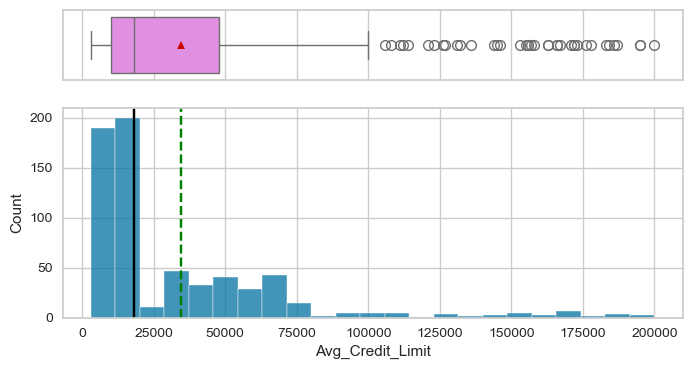

In [250]:
histogram_boxplot(df,'Avg_Credit_Limit',figsize=(8,4))
plt.savefig("box_Avg_Credit_Limit.png",dpi=400)

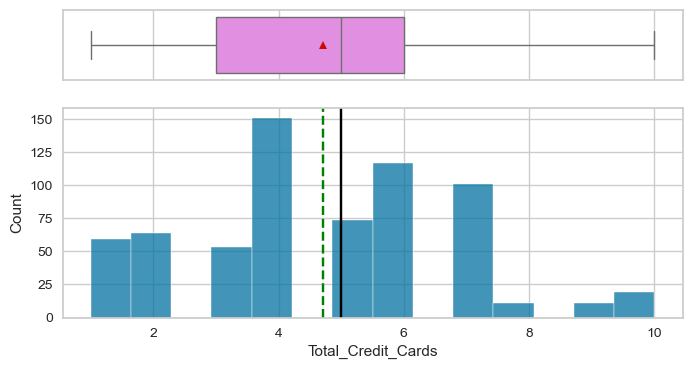

In [252]:
histogram_boxplot(df,'Total_Credit_Cards',figsize=(8,4))
plt.savefig("box_Total_Credit_Cards.png",dpi=400)

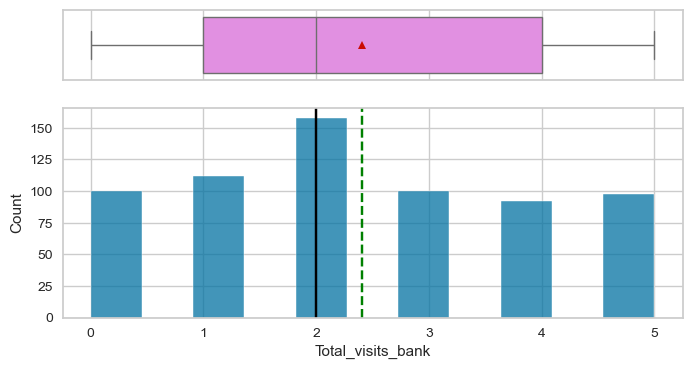

In [254]:
histogram_boxplot(df,'Total_visits_bank',figsize=(8,4))
plt.savefig("box_Total_visits_bank.png",dpi=400)

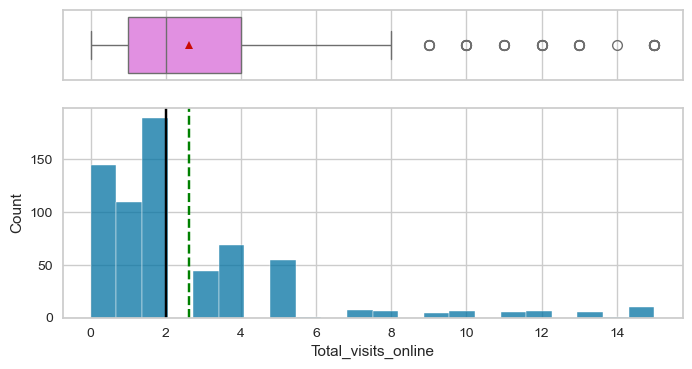

In [258]:
histogram_boxplot(df,'Total_visits_online',figsize=(8,4))
plt.savefig("box_Total_visits_online.png",dpi=400)

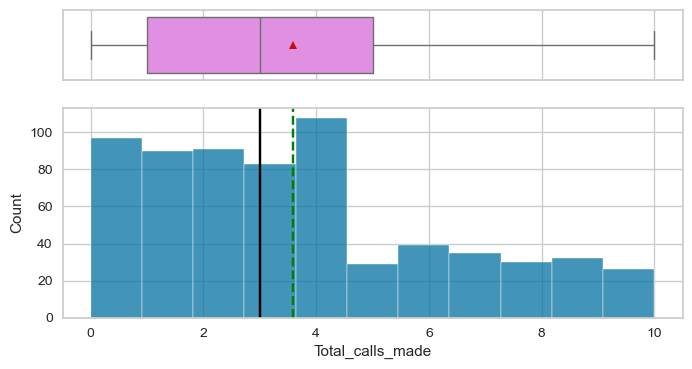

In [260]:
histogram_boxplot(df,'Total_calls_made',figsize=(8,4))
plt.savefig("box_Total_calls_made.png",dpi=400)

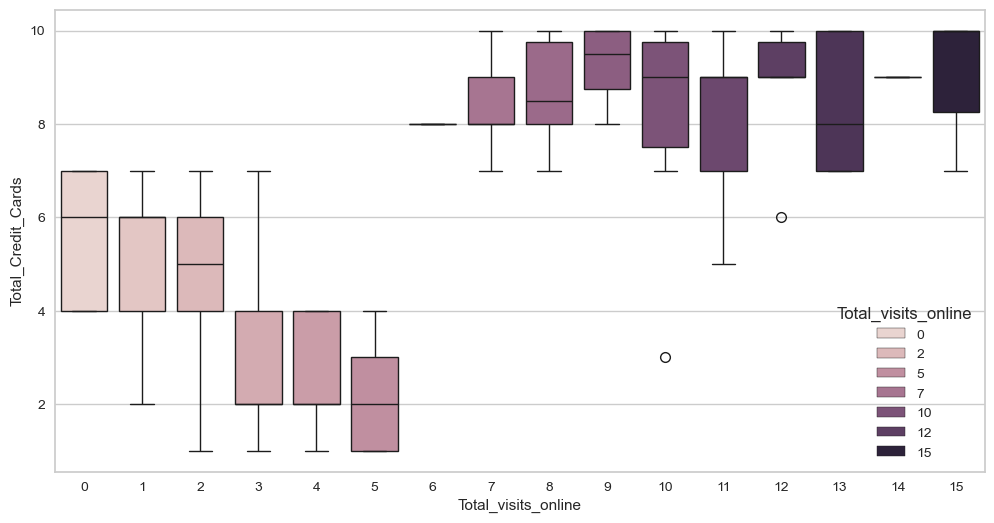

In [314]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Total_visits_online', y='Total_Credit_Cards',hue="Total_visits_online")  
plt.savefig("bi_box_Total_visits_online_Total_Credit_Cards.png",dpi=400)
plt.show()

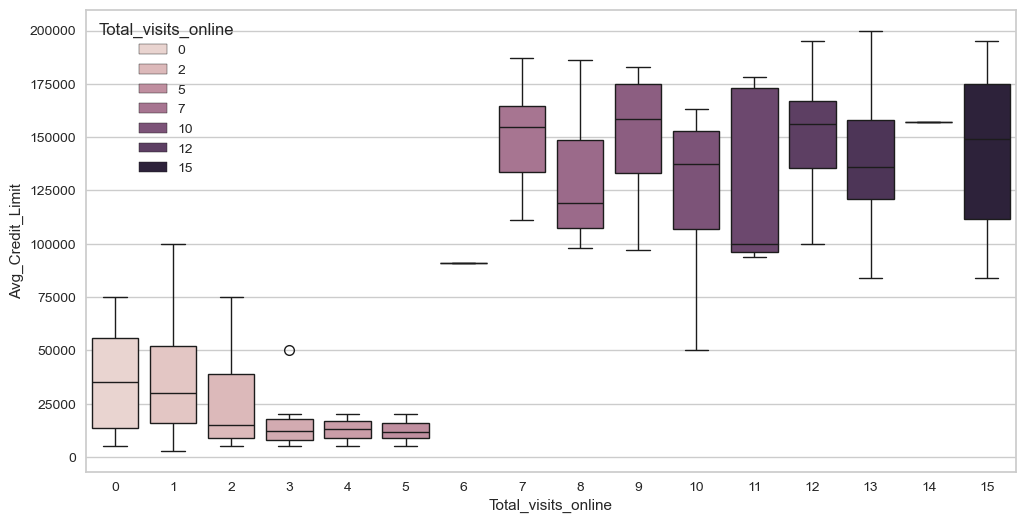

In [312]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Total_visits_online', y='Avg_Credit_Limit',hue="Total_visits_online")  
plt.savefig("bi_box_Total_visits_online_Avg_Credit_Limit.png",dpi=400)
plt.show()

In [336]:
df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'K_means_segments'],
      dtype='object')

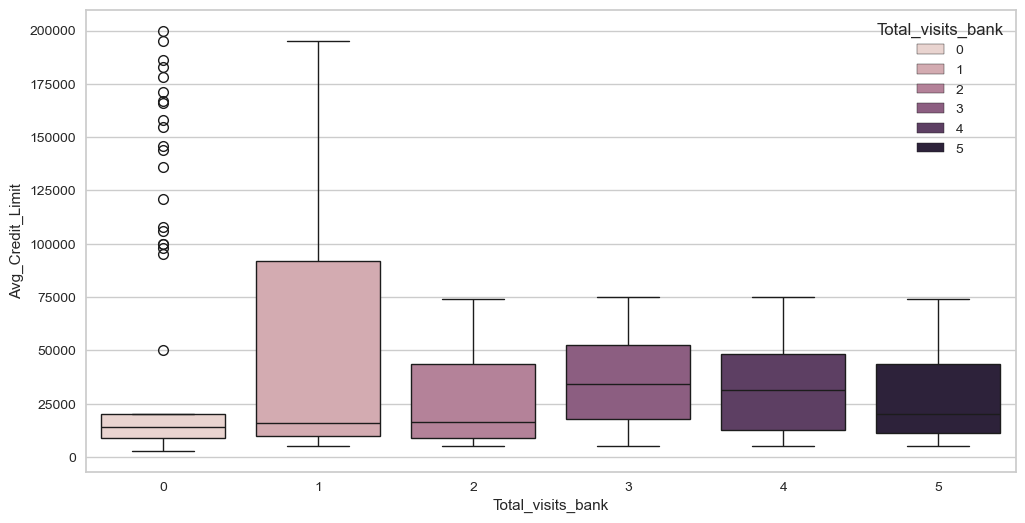

In [346]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Total_visits_bank', y='Avg_Credit_Limit',hue="Total_visits_bank")  
plt.savefig("bi_box_Total_visits_bank_Avg_Credit_Limit.png",dpi=400)
plt.show()

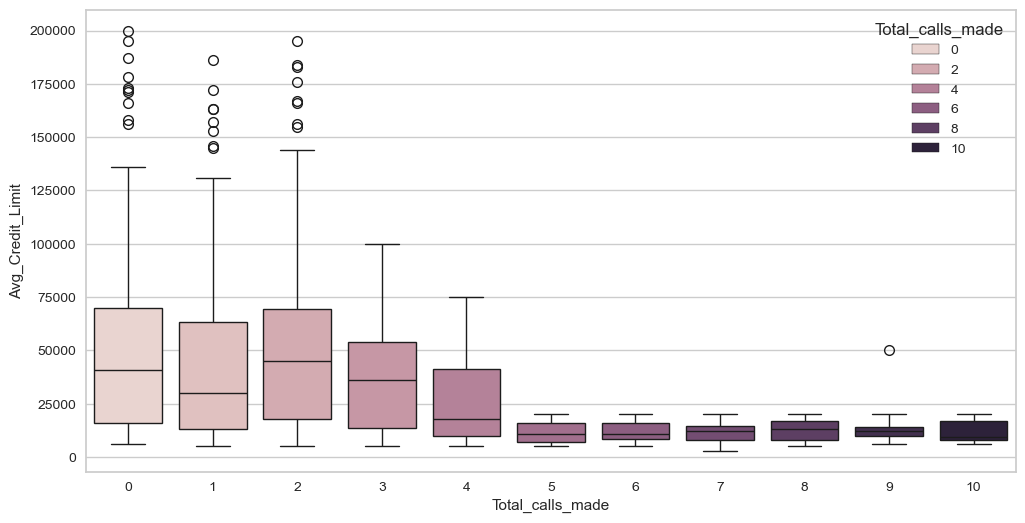

In [348]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Total_calls_made', y='Avg_Credit_Limit',hue="Total_calls_made") 
plt.savefig("bi_box_Total_calls_made_Avg_Credit_Limit.png",dpi=400)
plt.show()

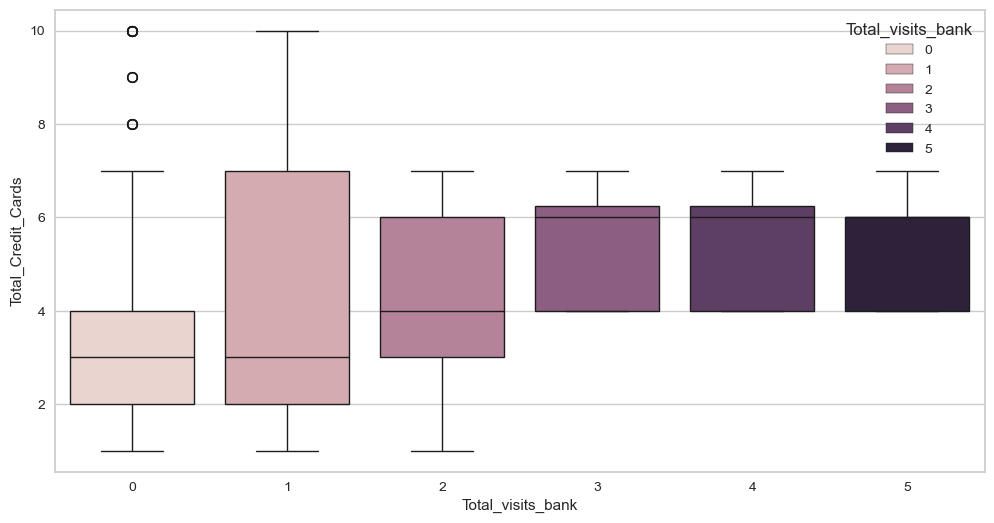

In [350]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Total_visits_bank', y='Total_Credit_Cards',hue="Total_visits_bank")  
plt.savefig("bi_box_Total_visits_bank_Total_Credit_Cards.png",dpi=400)
plt.show()

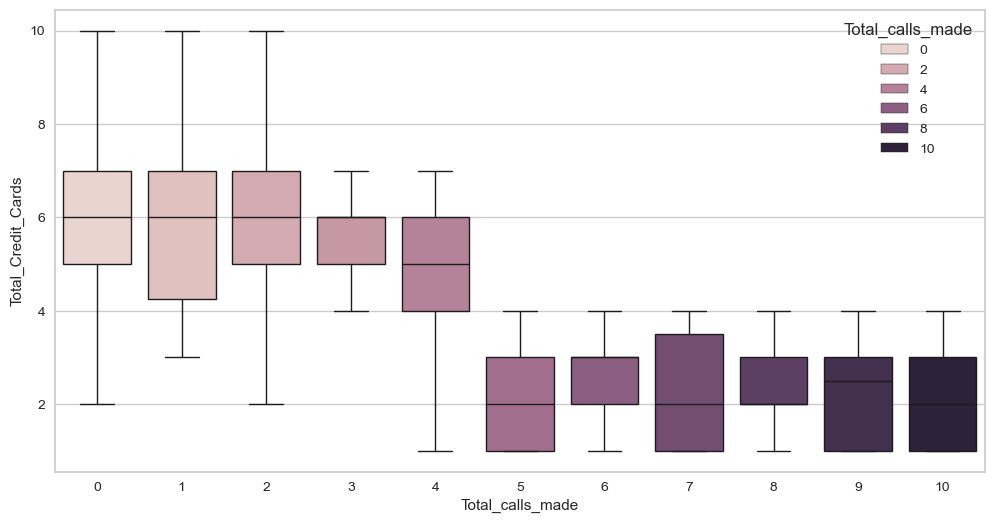

In [352]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Total_calls_made', y='Total_Credit_Cards',hue="Total_calls_made") 
plt.savefig("bi_box_Total_calls_madek_Total_Credit_Cards.png",dpi=400)
plt.show()

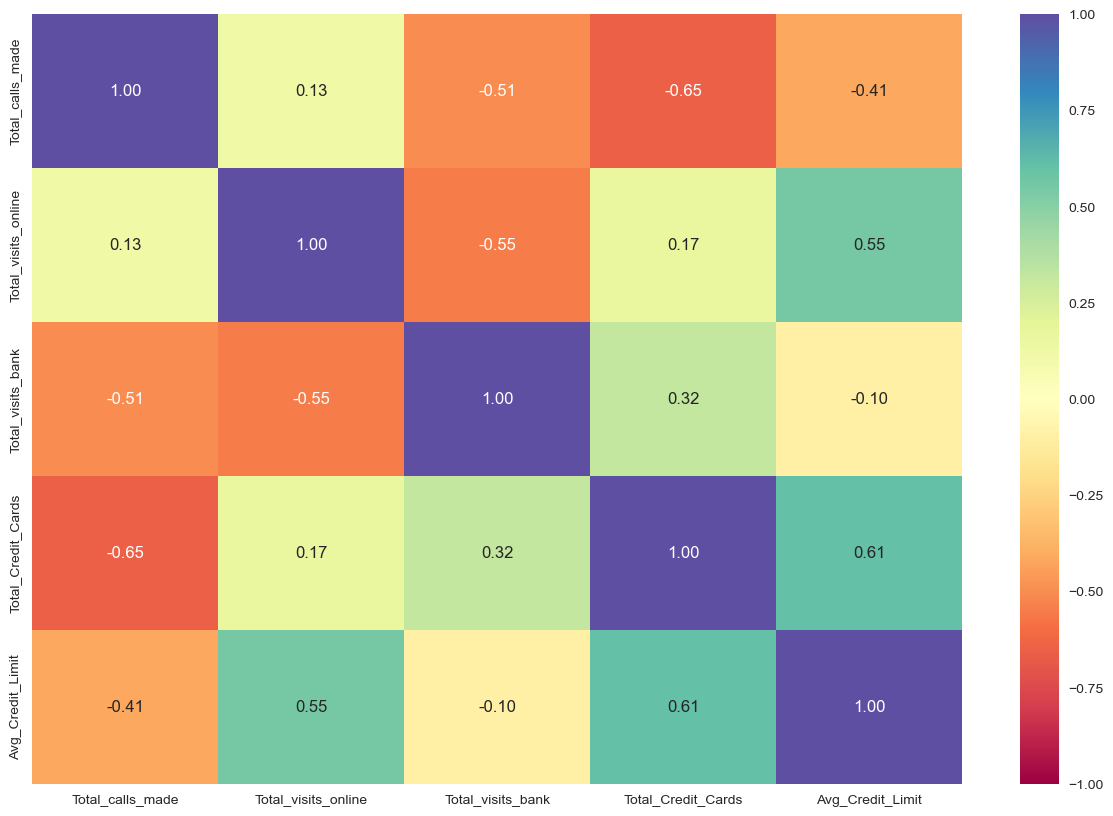

In [268]:
# correlation check
num_vars=['Total_calls_made','Total_visits_online','Total_visits_bank','Total_Credit_Cards','Avg_Credit_Limit']
plt.figure(figsize=(15, 10))
sns.heatmap(
    df[num_vars].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.savefig("corr.png",dpi=400)
plt.show()

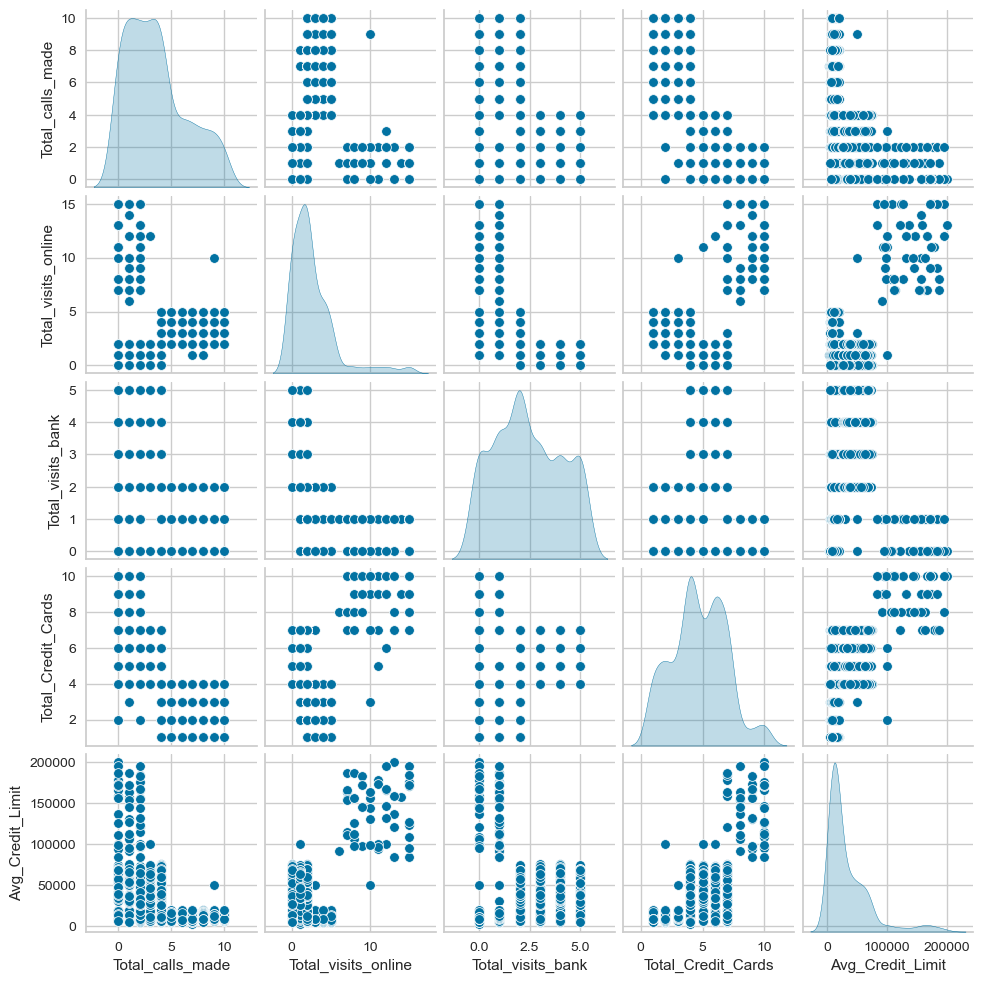

In [39]:
sns.pairplot(data=df[num_vars],height=2, diag_kind="kde")
plt.show()

In [41]:
# we will drop Sl_No and Customer Key which are not useful for the analysis
df.drop(["Sl_No","Customer Key"], axis=1, inplace=True)
df.head(5)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


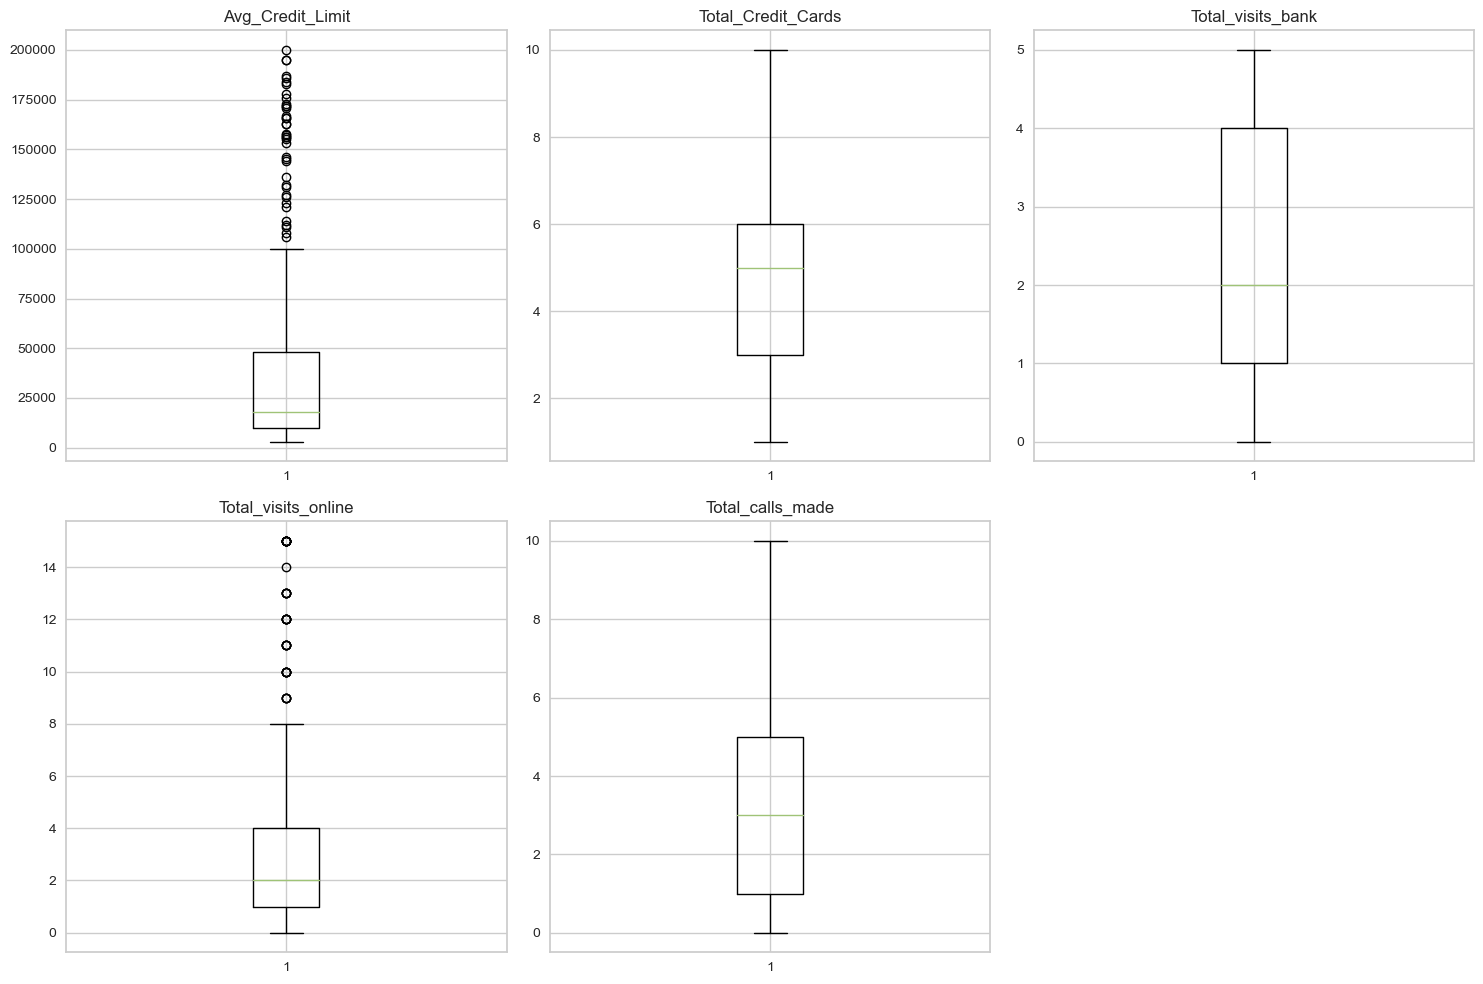

In [366]:
plt.figure(figsize=(15, 10))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.pop(-1)
for i, variable in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.savefig("outlier.png",dpi=400)
plt.show()

In [358]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df.copy()
subset_scaled = scaler.fit_transform(subset)

# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [49]:
subset_scaled_df.sample(5)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
364,-0.573829,0.597334,0.979390,-0.206600,-0.203739
370,-0.627025,0.135694,0.366110,-0.206600,-0.203739
580,0.463488,-0.325946,1.592670,-0.206600,-0.902271
641,2.910494,2.443892,-1.473731,2.520519,-0.553005
68,-0.733417,-1.710864,-0.247170,0.475180,2.241125


In [51]:
subset_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,8.612639e-17,1.000758,-0.839808,-0.653623,-0.440840,0.357097,4.399975
Total_Credit_Cards,660.0,4.306320e-17,1.000758,-1.710864,-0.787585,0.135694,0.597334,2.443892
Total_visits_bank,660.0,-4.306320e-17,1.000758,-1.473731,-0.860451,-0.247170,0.979390,1.592670
Total_visits_online,660.0,7.536059e-17,1.000758,-0.888380,-0.547490,-0.206600,0.475180,4.224968
Total_calls_made,660.0,-8.612639e-17,1.000758,-1.251537,-0.902271,-0.203739,0.494794,2.241125


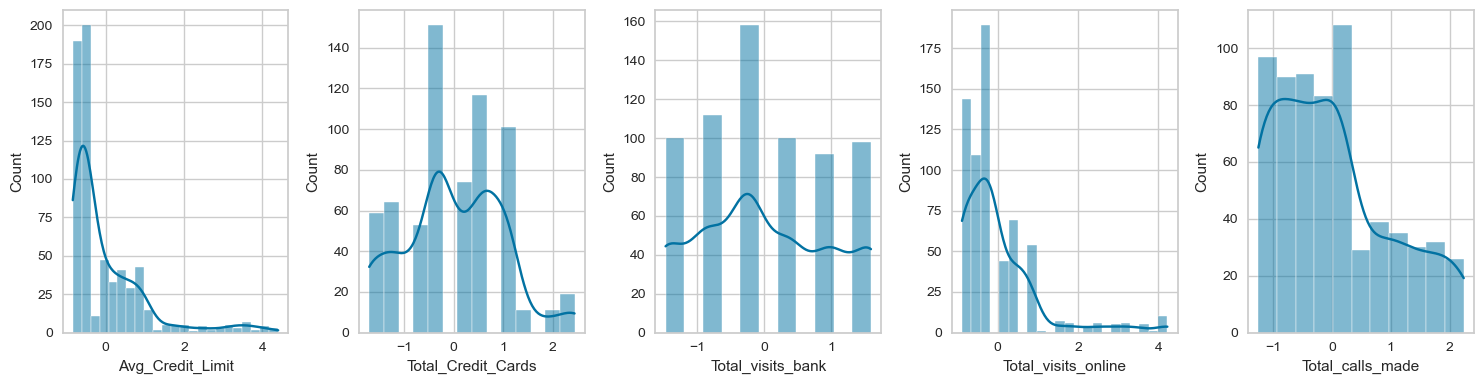

In [326]:
plt.figure(figsize=(15,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    x=subset_scaled_df.columns[i]
    sns.histplot(data=subset_scaled_df,x=x,kde=True)
plt.tight_layout()
plt.savefig("scaled_data.png",dpi=400)
plt.show()

Number of Clusters: 1 	Average Distortion: 2.2337229406380987
Number of Clusters: 2 	Average Distortion: 1.467065720996766
Number of Clusters: 3 	Average Distortion: 1.146701238427549
Number of Clusters: 4 	Average Distortion: 1.0468854739869728
Number of Clusters: 5 	Average Distortion: 0.9907008473878152
Number of Clusters: 6 	Average Distortion: 0.9429753673519395
Number of Clusters: 7 	Average Distortion: 0.9094907253615563
Number of Clusters: 8 	Average Distortion: 0.8845009253744414


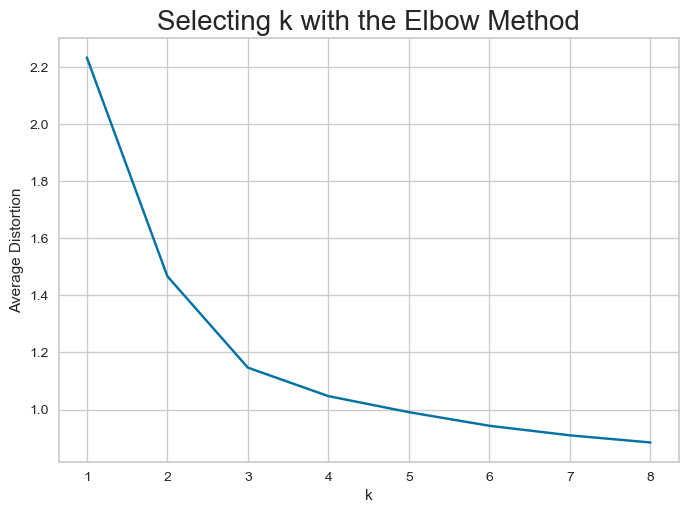

In [202]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.savefig("elbow.png",dpi=400)

From the elbow method it is clear that appropriate number of clusetr for this analysis is : 3

For n_clusters = 2, silhouette score is 0.4975887345071433
For n_clusters = 3, silhouette score is 0.590990473596407
For n_clusters = 4, silhouette score is 0.38895131642270275
For n_clusters = 5, silhouette score is 0.2761816210071658
For n_clusters = 6, silhouette score is 0.25917546352128557
For n_clusters = 7, silhouette score is 0.251557901019067
For n_clusters = 8, silhouette score is 0.2286481888556096
For n_clusters = 9, silhouette score is 0.22075859678814813


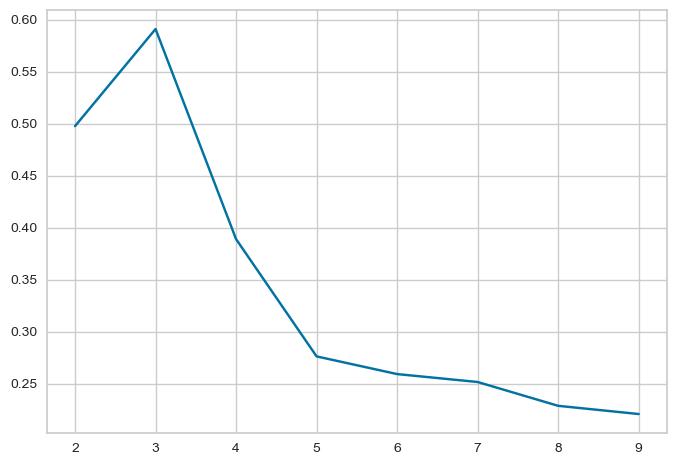

In [240]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.savefig("sil_score.png",dpi=400)
plt.show()

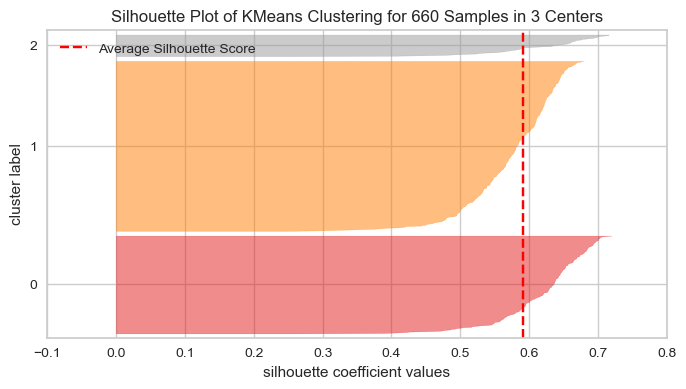

In [194]:
# finding optimal no. of clusters with silhouette coefficients
plt.figure(figsize=(8,4))
# plt.tight_layout(pad=2.0)
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
plt.savefig("silhoute_K_3.png",dpi=400)
visualizer.show()
plt.show()

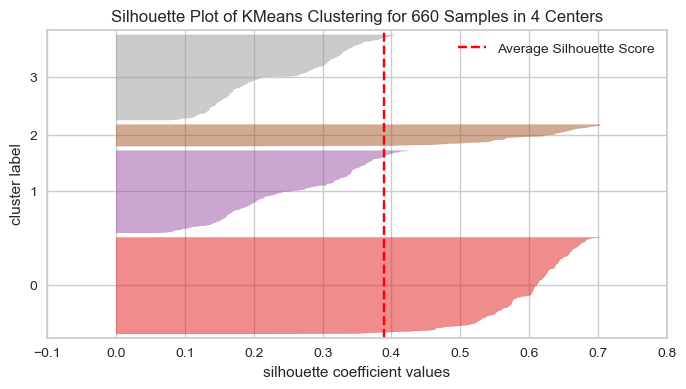

In [196]:
plt.figure(figsize=(8,4))
# plt.tight_layout(pad=2.0)
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
plt.savefig("silhoute_K_4.png",dpi=400)
visualizer.show()
plt.show()

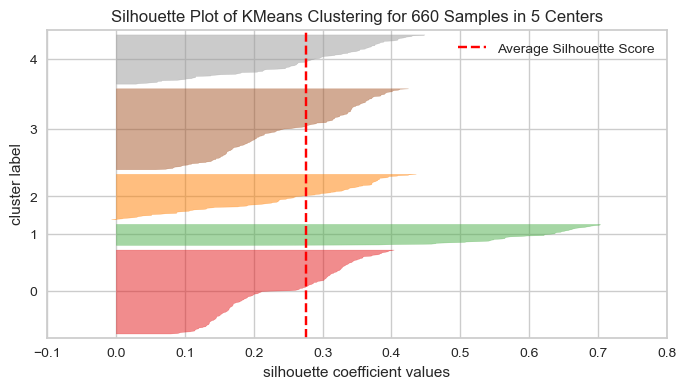

In [198]:
plt.figure(figsize=(8,4))
# plt.tight_layout(pad=2.0)
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
plt.savefig("silhoute_K_5.png",dpi=400)
visualizer.show()
plt.show()

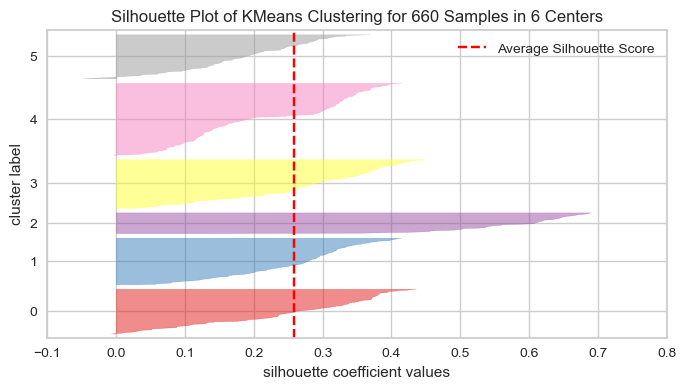

In [200]:
plt.figure(figsize=(8,4))
# plt.tight_layout(pad=2.0)
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
plt.savefig("silhoute_K_6.png",dpi=400)
visualizer.show()
plt.show()

In [75]:
# final model
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [77]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

In [170]:
cluster_profile = df.groupby("K_means_segments").mean(numeric_only = True)

In [172]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

In [174]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


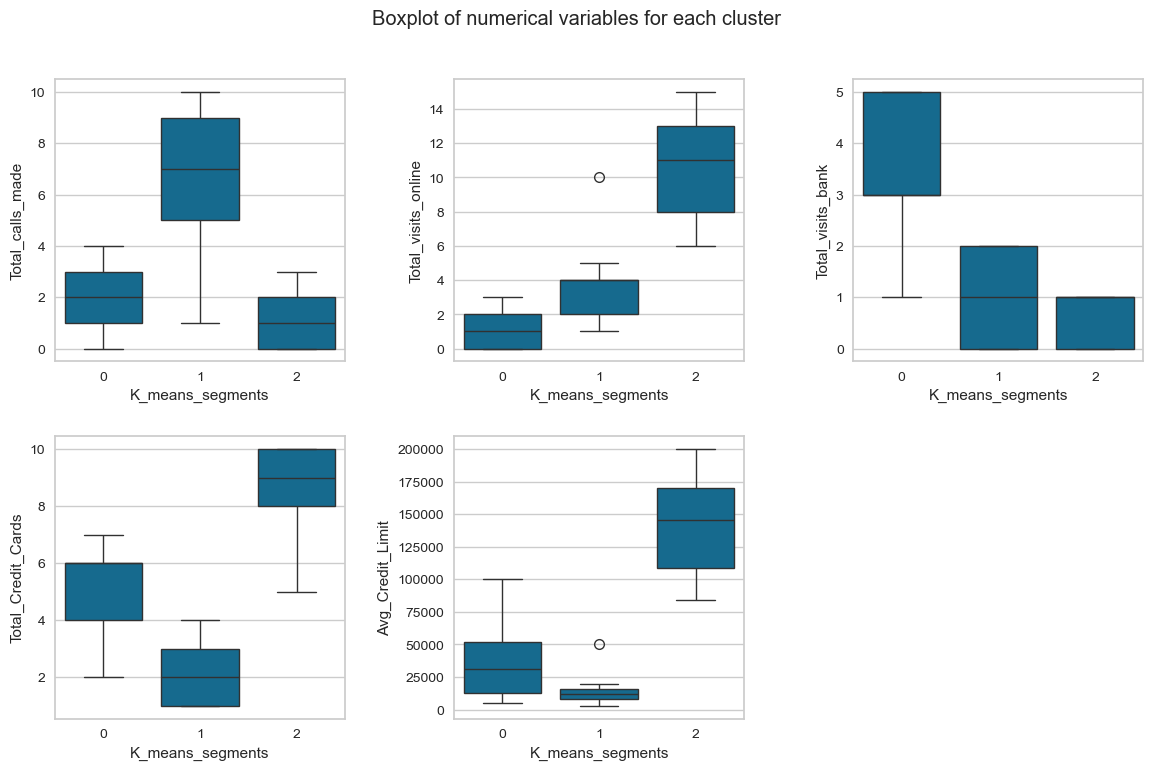

In [210]:
plt.figure(figsize=(12, 8))
plt.suptitle("Boxplot of numerical variables for each cluster")
num_cols=['Total_calls_made','Total_visits_online','Total_visits_bank','Total_Credit_Cards','Avg_Credit_Limit']
for i, variable in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

plt.savefig("Kmeans_cluster_box_plots.png",dpi=400)

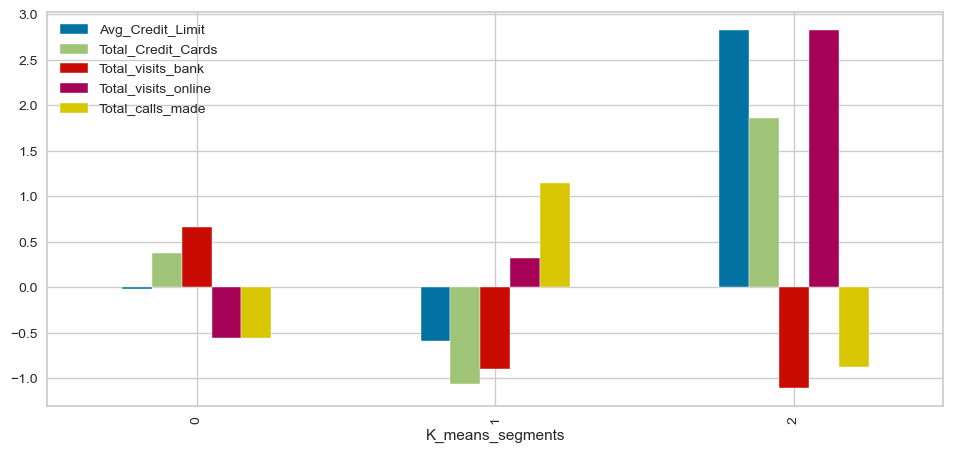

In [360]:
df_scaled=subset_scaled_df.copy()
df_scaled["K_means_segments"] = kmeans.labels_
df_scaled.groupby("K_means_segments").mean(numeric_only = True).plot.bar(figsize=(10, 5))
plt.tight_layout(pad=2.0)
plt.savefig("Kmens_segement_profile_bar.png",dpi=400)
plt.show()

In [ ]:
## Hierarchical clustering

In [101]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5422791209801746.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042134.
Cophenetic co

In [103]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


In [105]:
# Let's explore different linkage methods with Euclidean distance only.


# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


In [107]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


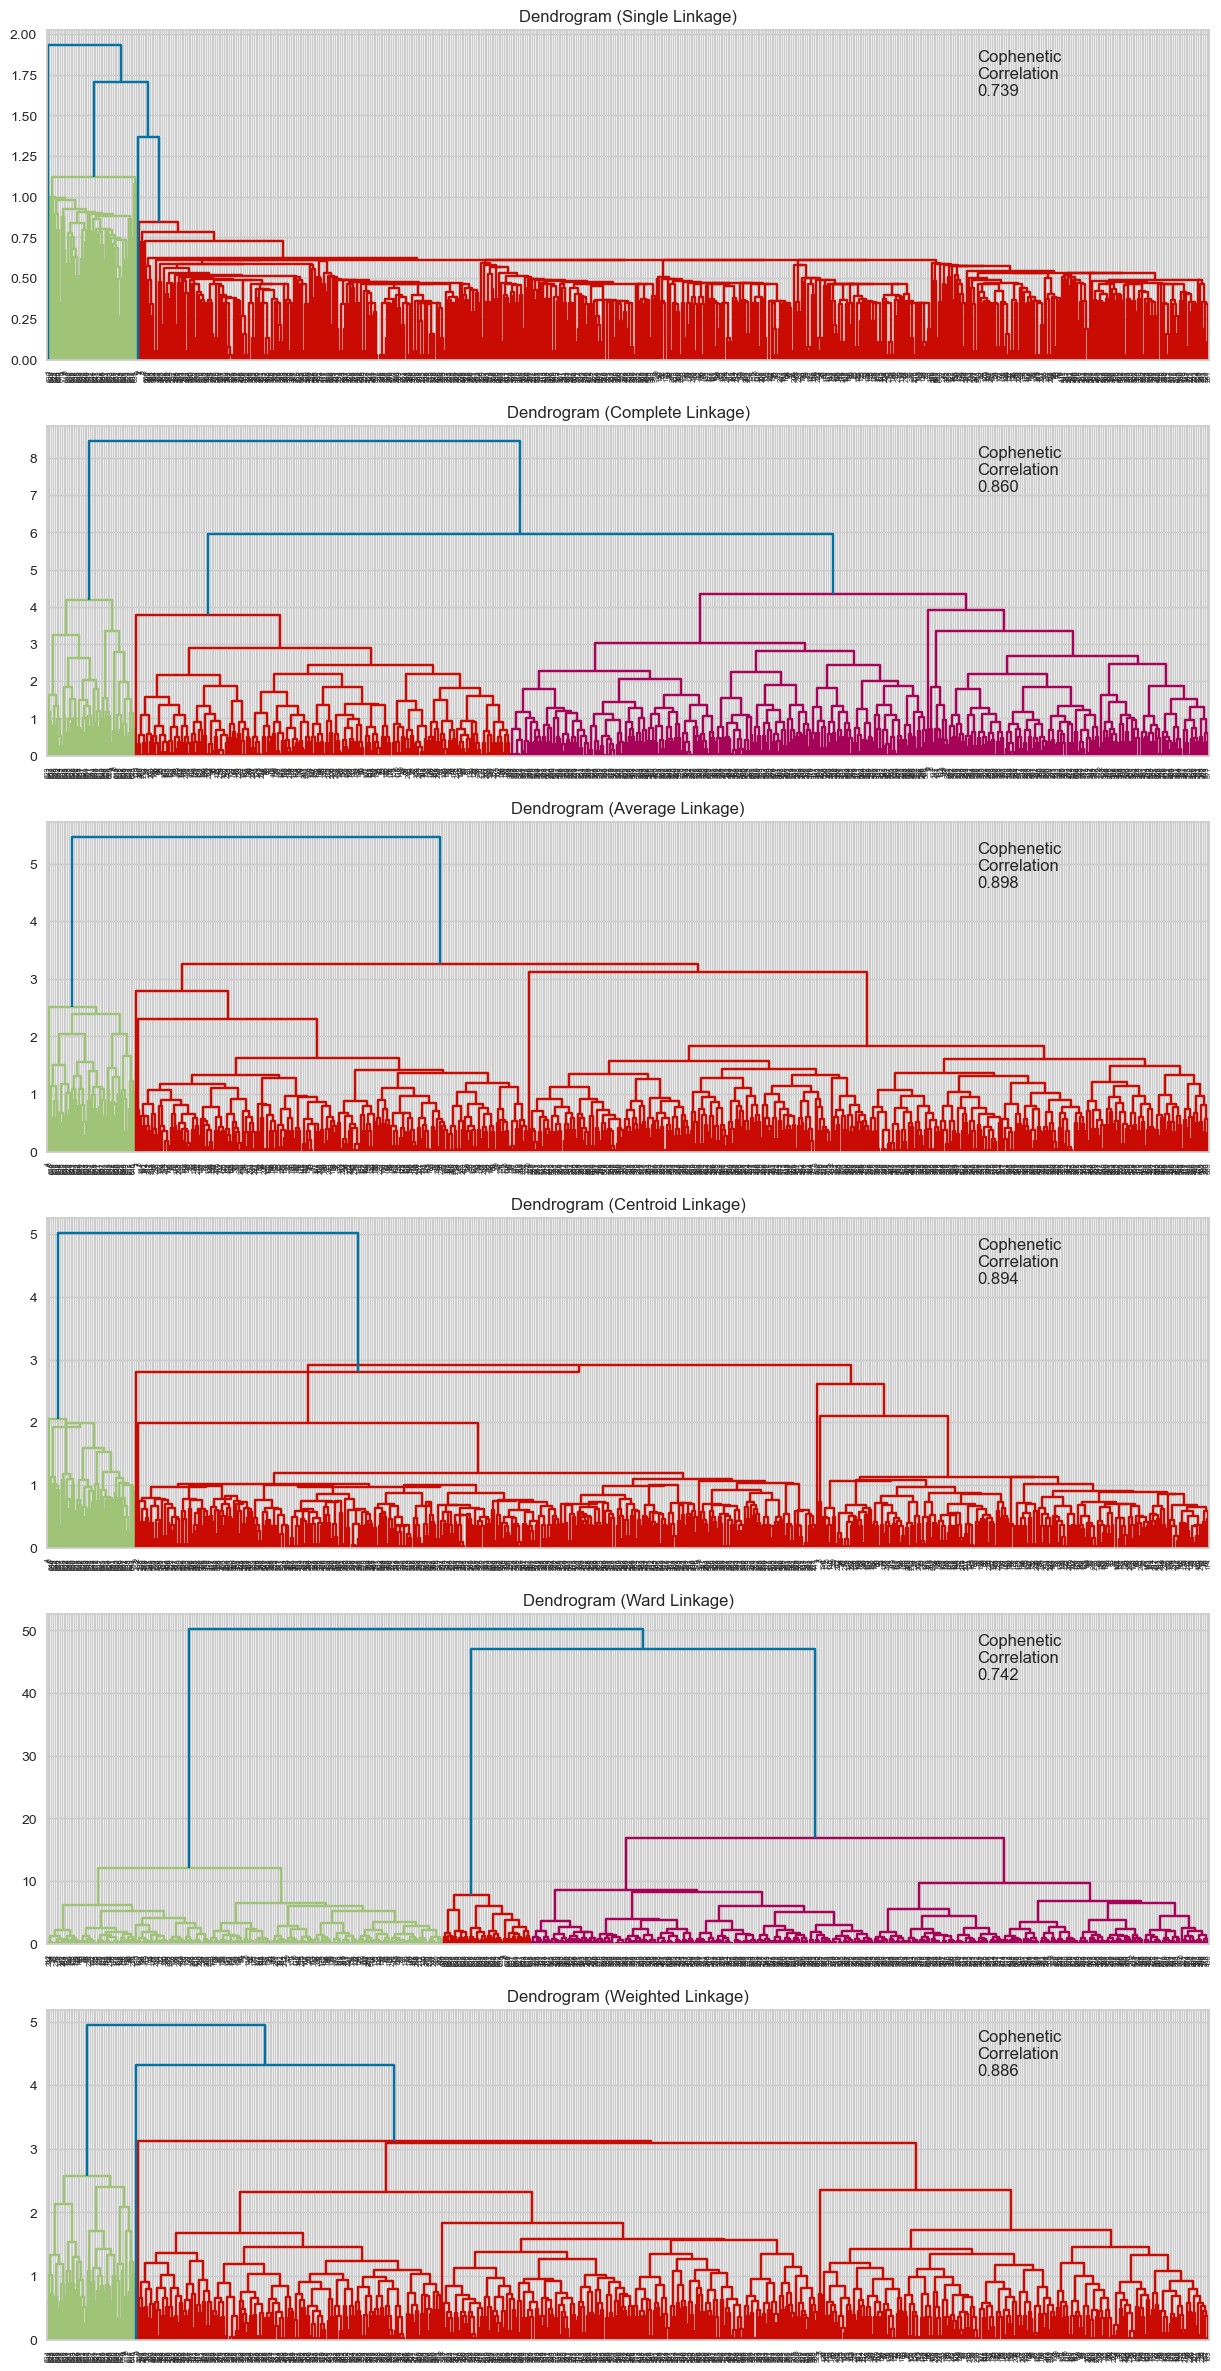

In [118]:
# Let's see the dendrograms for the different linkage methods.

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.3f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

Final HC model


In [116]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [230]:
# adding kmeans cluster labels to the original dataframe
df_HC=df.copy()
df_scaled_HC=subset_scaled_df.copy()
df_HC["HC_Clusters"] = HCmodel.labels_
df_scaled_HC["HC_Clusters"] = HCmodel.labels_

In [236]:
cluster_profile_HC = df_HC.groupby("HC_Clusters").mean(numeric_only = True)
cluster_profile_HC["count_in_each_segments_HC_cluster"] = (
    df_HC.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

In [238]:
# let's display cluster profiles
cluster_profile_HC.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments_HC_cluster
HC_Clusters,,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,0.002584,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,1.000000,223


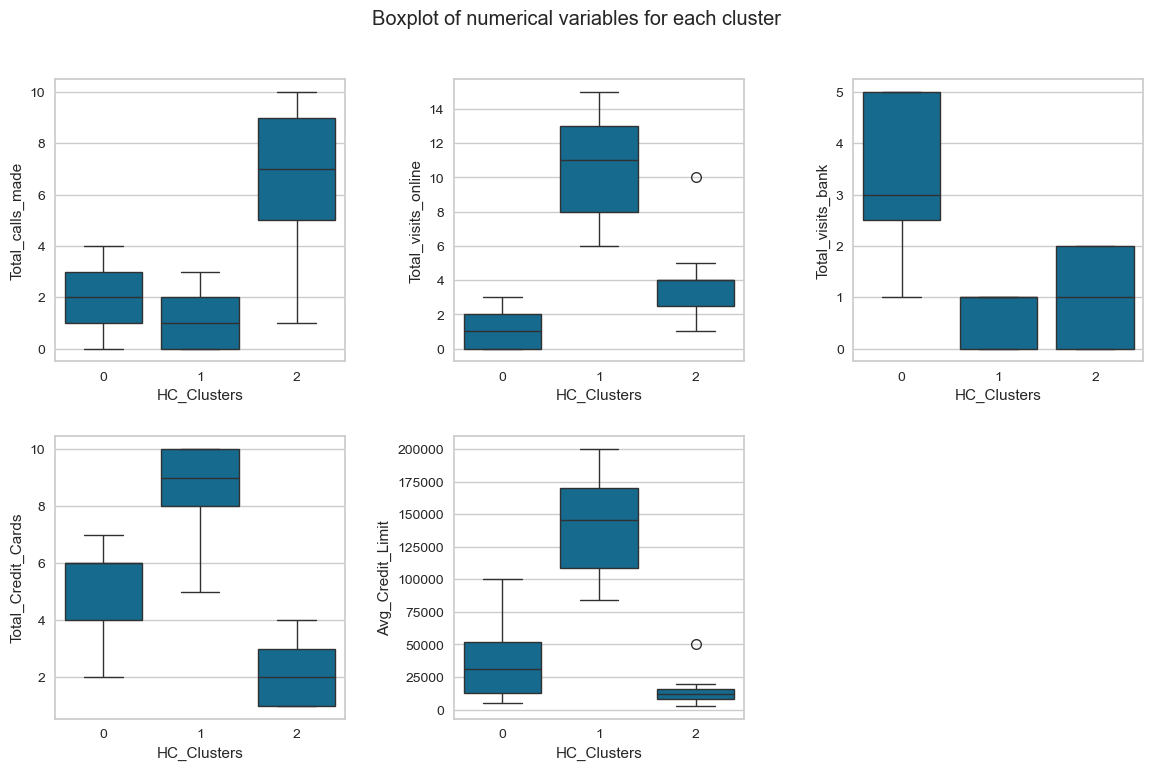

In [226]:
plt.figure(figsize=(12, 8))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df_HC, x="HC_Clusters", y=variable)
plt.tight_layout(pad=2.0)
plt.savefig("HC_cluster_box_plots.png",dpi=400)


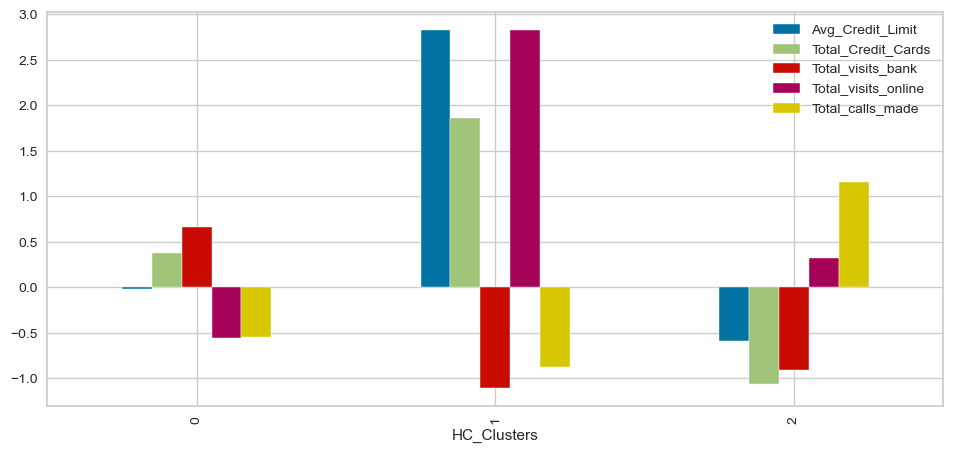

In [354]:
df_scaled_HC.groupby("HC_Clusters").mean(numeric_only = True).plot.bar(figsize=(10, 5))
plt.tight_layout(pad=2.0)
plt.savefig("HC_Clusters_profilr_bar.png",dpi=400)
plt.show()

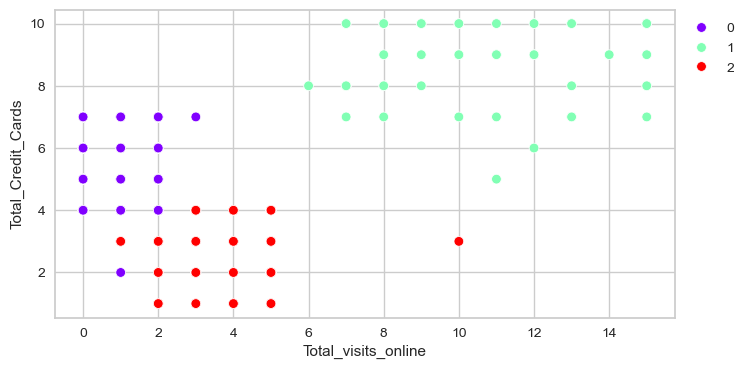

In [328]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=df_HC[num_cols],
    x="Total_visits_online",
    y="Total_Credit_Cards",
    hue=df_HC["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig("cluster_vis_cards_vs_online_visits_HC",dpi=400)
plt.show()

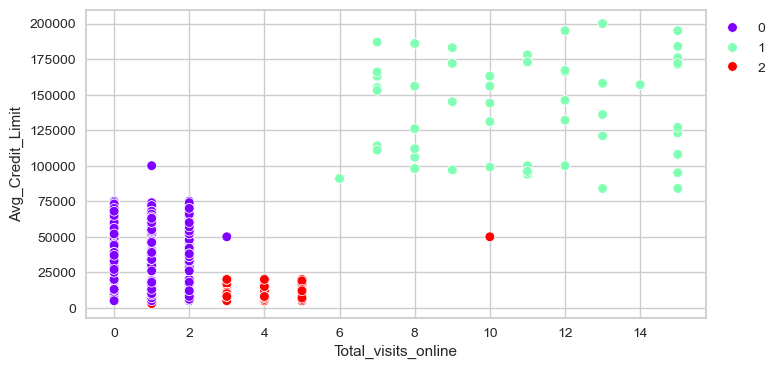

In [330]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=df_HC[num_cols],
    x="Total_visits_online",
    y="Avg_Credit_Limit",
    hue=df_HC["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig("cluster_vis_credit_vs_online_visit_HC",dpi=400)
plt.show()

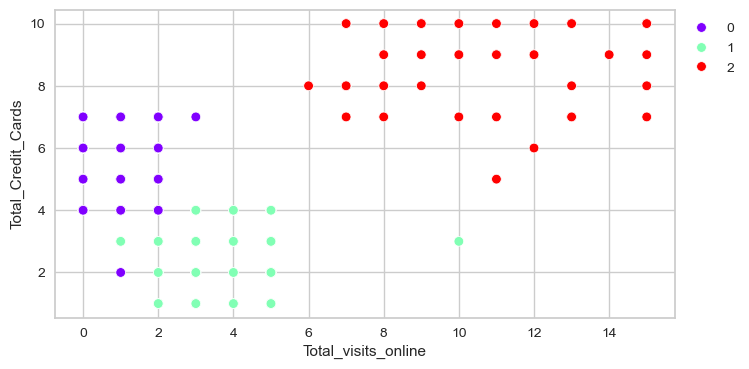

In [332]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=df[num_cols],
    x="Total_visits_online",
    y="Total_Credit_Cards",
    hue=df["K_means_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig("cluster_vis_cards_vs_online_visits_KM",dpi=400)
plt.show()

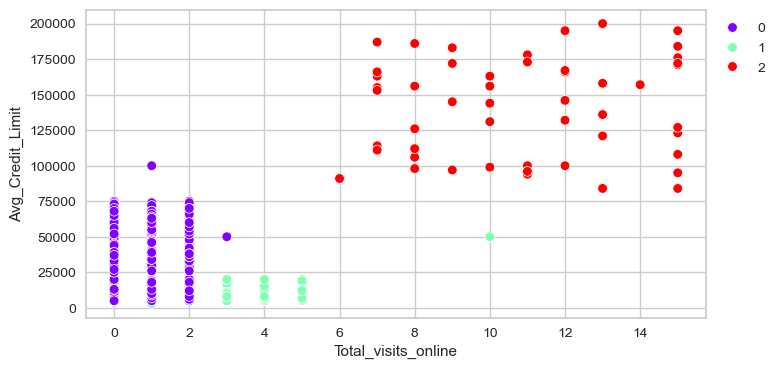

In [334]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=df[num_cols],
    x="Total_visits_online",
    y="Avg_Credit_Limit",
    hue=df["K_means_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig("cluster_vis_credit_vs_online_visit_KM",dpi=400)
plt.show()

In [294]:
df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'K_means_segments'],
      dtype='object')